### Forward kinematics of `Panda`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mujoco_parser import MuJoCoParserClass
np.set_printoptions(precision=2)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("Ready.")

Ready.


### Parse `Panda` and plot 

In [2]:
env = MuJoCoParserClass(name='Panda',xml_path='../asset/panda/franka_panda.xml')
env.init_viewer(window_width=0.3,window_height=0.3,
                cam_azimuth=80.0,cam_distance=3.0,
                cam_elevation=-30.0,cam_lookat=np.array([0,0,1.5]))
print ("Done.")

Creating window glfw
Done.


### Forward kinematics of `Panda` of random poses

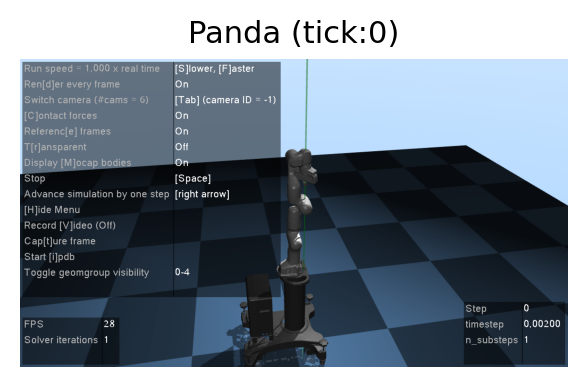

In [3]:
env.forward_renders(max_tick=100)
env.plot_scene(figsize=(5,2),title_str='Panda (tick:%d)'%(env.tick),title_fs=11)

In [4]:
env.reset()
max_tick = 100
q_list   = np.zeros((max_tick,env.n_rev_joint))
while env.tick < max_tick:
    rev_range = env.joint_range[env.rev_joint_idxs]
    q_rand = rev_range[:,0]+(rev_range[:,1]-rev_range[:,0])*np.random.rand(env.n_rev_joint)
    env.forward(q_pos=q_rand,q_pos_idxs=env.rev_joint_idxs)
    env.render(RENDER_ALWAYS=True)
    # Append
    q_list[env.tick-1,:] = env.get_q_pos(q_pos_idxs=env.rev_joint_idxs)
print ("Done.")

Done.


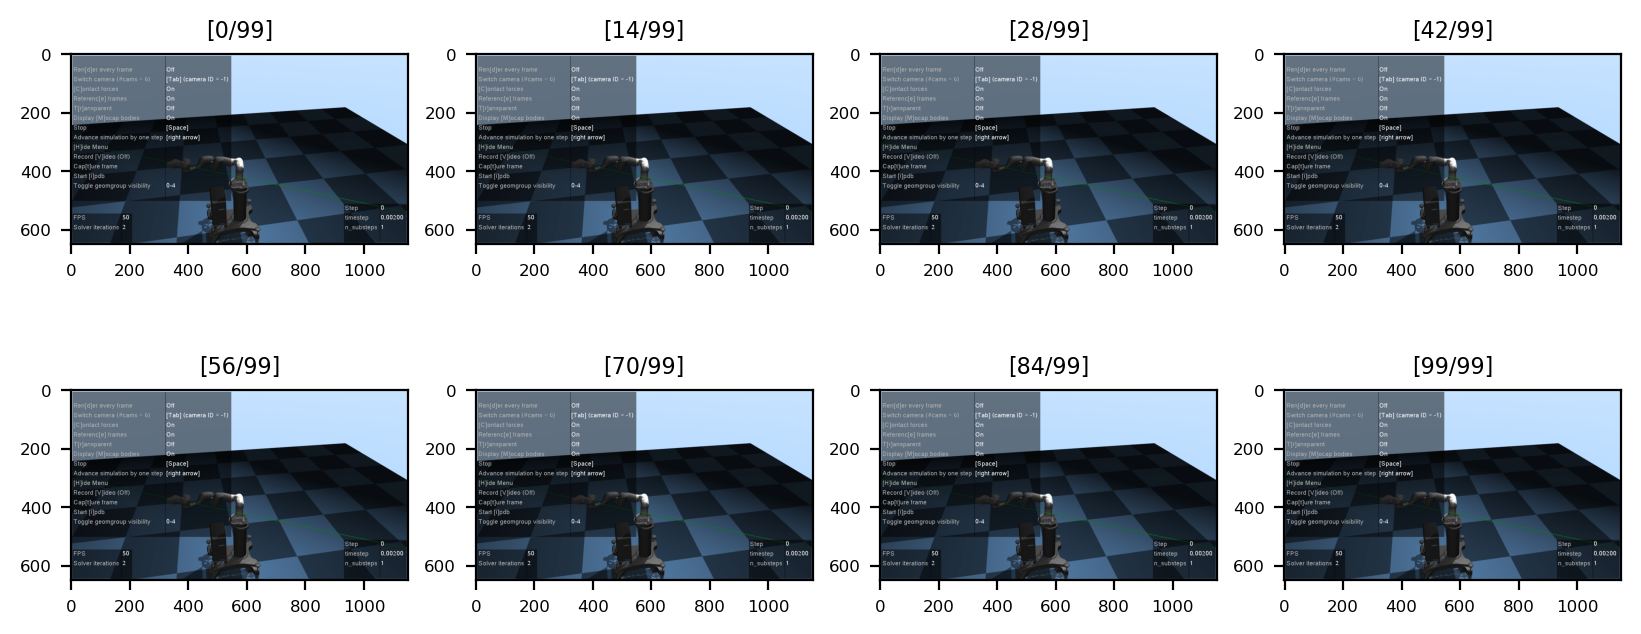

In [5]:
# Plot snapshots for Panda with FK
fig = plt.figure(figsize=(10,4))
for idx,tick in enumerate(np.linspace(0,max_tick-1,8).astype(np.int32)):
    env.forward(q_pos=q_list[tick,:],q_pos_idxs=env.rev_joint_idxs)
    img = env.plot_scene(RETURN_IMG=True)
    ax = fig.add_subplot(2,4,idx+1)
    ax.imshow(img)
    ax.set_title('[%d/%d]'%(tick,max_tick-1),fontsize=8)

### Terminate viewer

In [6]:
env.terminate_viewer()
print ("Viewer terminated.")

Viewer terminated.
